# Linear Regression

In [251]:
import pandas as pd
import matplotlib.pyplot as plt


In [252]:
#Importing the CSV
winequality_red=pd.read_csv("/Users/sumanthmeela/Desktop/Course/Machine Learning/datasets/winequality-red.csv")

In [3]:
winequality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(winequality_red.isnull().sum())
#No null values, so no need to omit any row

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
import numpy as np
#Build a matrix for X and Y
#Input features includes all the columns except pH
X=np.matrix(winequality_red.drop("pH",axis=1).values)
#Output features includes pH
Y=np.matrix(winequality_red["pH"].values).T
print(Y)

[[3.51]
 [3.2 ]
 [3.26]
 ...
 [3.42]
 [3.57]
 [3.39]]


In [6]:
#To randomize the order
np.random.seed(123)
#Total no of rows
Tot_samples=X.shape[0]
#Splitting train data by X 0.8 over total samples
Train_samples=int(0.8*Tot_samples)
Test_samples=Tot_samples-Train_samples
#Giving index to the total_samples 
index = np.arange(Tot_samples)
#Shuffling the index
np.random.shuffle(index)
#Selecting first number of train rows from randmo shuffling
Train_rows=index[:Train_samples]
#Selecting the last rows after total number of train rows
Test_rows=index[Train_samples:]

X_train = X[Train_rows]
Y_train = Y[Train_rows]
X_test = X[Test_rows]
Y_test = Y[Test_rows]

In [7]:
#Shapes of train and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (1279, 11)
y_train shape: (1279, 1)
X_test shape: (320, 11)
y_test shape: (320, 1)


In [156]:
#Finding weights by the equation w = (XT X)−1 XT y
w=np.linalg.inv(X_train.T*X_train)*X_train.T*Y_train

print(w)

[[-5.60775963e-02]
 [ 6.91218791e-02]
 [-4.86351728e-02]
 [-6.18530059e-05]
 [-6.22777112e-01]
 [ 1.23798558e-03]
 [-8.13084523e-04]
 [ 3.66498506e+00]
 [ 1.94210620e-02]
 [ 2.40783755e-02]
 [-1.55705981e-02]]


In [9]:
#Finding Y train from the weights given
Y_train_predicted=X_train*w
#Residuals from the actual value
Y_train_residuals=Y_train-Y_train_predicted
#Squaring the residuals
MSE_train_squares=np.square(Y_train_residuals)
#Summing up the residuals
MSE_train=np.sum(MSE_train_squares)
print(MSE_train)

13.366417900827303


In [10]:
#Finding Y test from the weights given
Y_test_predicted=X_test*w
#Residuals from the actual value
Y_test_residuals=Y_test-Y_test_predicted
#Squaring the residuals
MSE_test_squares=np.square(Y_test_residuals)
#Summing up the residuals
MSE_test=np.sum(MSE_test_squares)
print(MSE_test)

2.9610017475332753


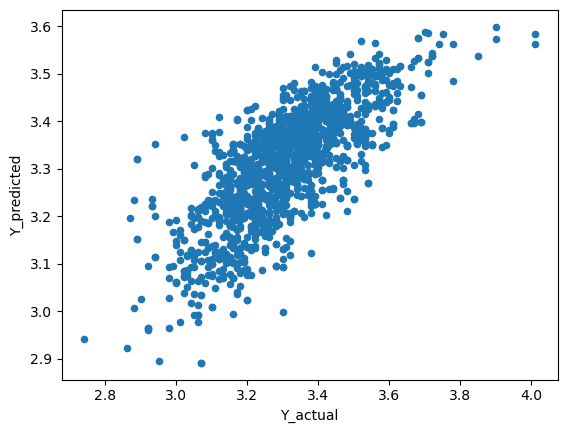

In [160]:
#Plotting the graph of actual Y and predicted Y
Y_predicted=X*w
Y_actual_array=np.array(Y)
Y_predicted_array=np.array(Y_predicted)
plt.scatter(Y_actual_array, Y_predicted_array, label='Actual vs. Predicted', marker='o', s=20)
plt.xlabel('Y_actual')
plt.ylabel('Y_predicted')
plt.show()

# Logisitic Regression

In [65]:
#Importing the CSV
penguins=pd.read_csv("/Users/sumanthmeela/Desktop/Course/Machine Learning/datasets/penguins.csv")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g  sex  
0       3750.0  1.0  
1       3800.0  0.0  
2       3250.0  0.0  
3          NaN  NaN  
4       3450.0  0.0  


In [67]:
print(penguins.isnull().sum())
penguins=penguins.dropna()
penguins.head()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0


In [49]:
#Stats
summary=penguins.describe()
print(summary)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              sex  
count  333.000000  
mean     0.504505  
std      0.500732  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


In [68]:
#Changing strings to categories
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')
#Dropping species and Island as those are category columns
penguins=penguins.drop(['species', 'island'], axis=1)
print(penguins.dtypes)

bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


In [70]:
# Min-Max normalization function
def min_max_normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)


In [71]:
#Defining normalized columns
normalize_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
minimum_values = penguins[normalize_columns].min()
maximum_values = penguins[normalize_columns].max()

# Apply min-max normalization to selected columns
for col in normalize_columns:
    penguins[col] = penguins[col].apply(min_max_normalize, args=(minimum_values[col], maximum_values[col]))

In [72]:
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.152542,0.291667,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0
4,0.167273,0.738095,0.355932,0.208333,0.0
5,0.261818,0.892857,0.305085,0.263889,1.0


In [73]:
X2=np.matrix(penguins.drop("sex",axis=1).values)
Y2=np.matrix(penguins["sex"].values).T
print(X2.shape)
print(Y2.shape)

(333, 4)
(333, 1)


In [150]:
#To randomize the order
np.random.seed(123)
#Total no of rows
Tot_samples2=X2.shape[0]
#Splitting train data by X 0.8 over total samples
Train_samples2=int(0.8*Tot_samples2)
Test_samples2=Tot_samples2-Train_samples2
#Giving index to the total_samples 
index2 = np.arange(Tot_samples2)
#Shuffling the index
np.random.shuffle(index2)
#Selecting first number of train rows from randmo shuffling
Train_rows2=index2[:Train_samples2]
#Selecting the last rows after total number of train rows
Test_rows2=index2[Train_samples2:]

X_train2 = X2[Train_rows2]
Y_train2 = Y2[Train_rows2]
X_test2 = X2[Test_rows2]
Y_test2 = Y2[Test_rows2]

In [151]:
#Shapes
print("X_train2 shape:", X_train2.shape)
print("y_train2 shape:", Y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("y_test2 shape:", Y_test2.shape)

X_train2 shape: (266, 4)
y_train2 shape: (266, 1)
X_test2 shape: (67, 4)
y_test2 shape: (67, 1)


In [209]:
import numpy as np

#Defining class
class LogisticRegression:
    #Giving learning rate and iterations
    def __init__(self, learning_rate=0.1, iterations=1000000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
#Function for fitting     
    def fit(self, X_train2, Y_train2):
        self.weights = np.zeros(X_train2.shape[1])
        self.bias = 0
        self.loss=[]

        for i in range(self.iterations):
            self.gradient_descent(X_train2, Y_train2)

#Sigmoid function 1/(1+e^-z)             
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
#Loss function
    def cost(self, Y_train2, Y_train2_pred):
        return -np.mean(Y_train2 * np.log(Y_train2_pred) + (1 - Y_train2) * np.log(1 - Y_train2_pred))

    #Gradient descent for optimization to find out the btes weights        
    def gradient_descent(self, X_train2, Y_train2):
        a = X_train2.shape[0]
        b = np.dot(X_train2, self.weights) + self.bias
        Y_train2_pred = self.sigmoid(b).T

        dw = (1 / a) * np.dot(X_train2.T, (Y_train2_pred - Y_train2))
        db = (1 / a) * np.sum(Y_train2_pred - Y_train2)
        
        converted_dw = dw.A.ravel()

        self.weights = self.weights - (self.learning_rate * converted_dw)
        self.bias -= self.learning_rate * db
        
#Predicting for train data
    def predict(self, X_train2):
        z = np.dot(X_train2, self.weights) + self.bias
        #Applying sigmoid function over z
        Y_train2_pred = self.sigmoid(z)
        return (Y_train2_pred >= 0.5).astype(int)

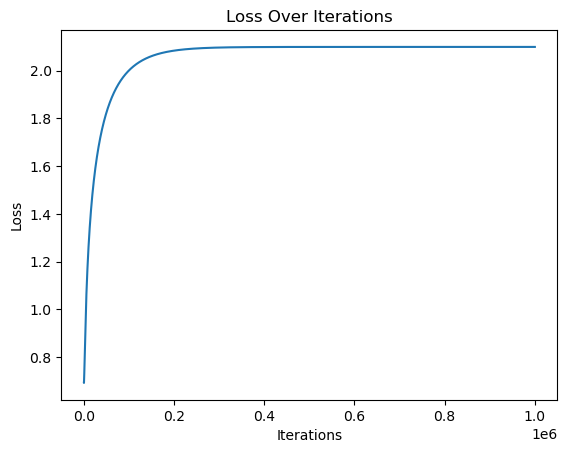

In [253]:
#calling class to fit over train data
abc=LogisticRegression()
abc.fit(X_train2,Y_train2)
Y_test2_pred=abc.predict(X_test2)
Y_train2_pred=abc.predict(X_train2)


In [254]:
#Creating functions for accuracy, correct and wrong predictions
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)
def correct(y_pred, y_test):
    return np.sum(y_pred==y_test)
def wrong(y_pred, y_test):
    return np.sum(y_pred!=y_test)


In [266]:
#Storing accuracy, correct and wrong values of test data in variables
train_acc = accuracy(Y_train2_pred.T, Y_train2)
test_acc = accuracy(Y_test2_pred.T, Y_test2)
train_cor = correct(Y_train2_pred.T, Y_train2)
test_cor = correct(Y_test2_pred.T, Y_test2)
train_wrong = wrong(Y_train2_pred.T, Y_train2)
test_wrong = wrong(Y_test2_pred.T, Y_test2)

#Results for the above model
print("Train accuracy:", train_acc*100)
print("Test accuracy:", test_acc*100)
print("Train correct:", train_cor)
print("Test correct:", test_cor)
print("Train wrong:", train_wrong)
print("Test wrong:", test_wrong)

Train accuracy: 91.72932330827066
Test accuracy: 82.08955223880598
Train correct: 244
Test correct: 55
Train wrong: 22
Test wrong: 12
